# Corrección/Taller 2 - Python
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa
## Presentado por Luis Alejandro Giraldo
Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

1. Realice un función para expresar cualquier número entero en su conotación factorial. <br>
Ejemplo: factorial(4)<br>
Out: 24

In [1]:
def factorial (x):
    i=1
    fact=1
    while i<=x:
        fact=fact*i
        i+=1
    return fact   

factorial(4)
#Ojo con la identación
# 1 Punto

24

2. Realice un función para expresar la potencia de cualquier número. La función recibe como parámetros la base y el exponencial. <br>
Ejemplo: potencia(4,2)<br>
Out: 16

In [2]:
def potencia(a,b):
    i=1
    pot=1
    while i<=b:
        pot=pot*a
        i+=1
    return pot 

potencia(5,6)
#Ojo con la identación
#1 Punto

15625

3. Utilizando las dos funciones anteriormente definidas (factorial y potencia), realice un función para expresar el Coseno de un entero. <br>
Ejemplo: coseno(5)<br>
Out: 0.996194698

In [3]:
import math #Para usar pi
#def potencia(a,b): #Potencia de un número
#    i=1
#    pot=1
#    while i<=b:
#        pot=pot*a
#        i+=1
#    return pot 

#def factorial (x): #Factorial de un número
#    i=1
#    fact=1
#    while i<=x:
#        fact=fact*i
#        i+=1
#    return fact   

def coseno(x):
    #x=x*(math.pi/180)  #Grados a radianes. La función coseno recibe valores de x en radianes
    i=2
    neg=0
    j=4
    pos=0
    result=0
    while i<100: #Valores negativos del coseno. Con 100 iteraciones se obtiene una buena resolución de la función coseno
        neg=neg-(potencia(x,i)/factorial(i))
        i+=4
    while j<100: #Valores positivos del coseno
        pos=pos+(potencia(x,j)/factorial(j))
        j+=4
    result= 1+neg+pos  
    return result   
   
coseno(5)

#Ojo con la identación
#1 punto

0.2836621854632355

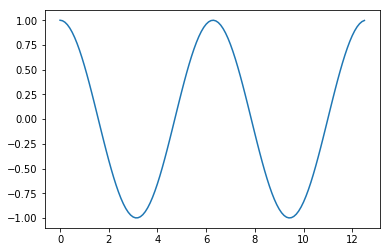

In [8]:
#Graficar el coseno en el tiempo
import matplotlib.pyplot as plt
x = np.arange(0, 4*math.pi, 0.1)
y = coseno(x)
plt.plot(x,y)
plt.show()

In [17]:
#Graficando el coseno con ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
def func(Grados):
    k = np.arange(0, Grados*math.pi, 0.1)
    y = coseno(k)
    plt.plot(k,y)
    plt.show()
    return (y)

In [18]:
R=interactive(func,Grados=[0.5,1,2,4,8,12])
display(R)

interactive(children=(Dropdown(description='Grados', options=(0.5, 1, 2, 4, 8, 12), value=0.5), Output()), _do…

4. Dadas las cantidades de individuos con los genótipos AA, AB y BB. Calcular la frecuencia de los alelos A y B <br>
Ejemplo: FrecuenciaAlelos(12,4,4) <br>
Out: (0.7, 0.3)

In [19]:
def alelos(a,b,c):
    den=a+b+c  
    frec=[(a+(b/2))/den,((b/2)+c)/den]
    return frec

alelos(12,4,4)
#Ojo con la identación
#1 punto

[0.7, 0.3]

5. Dada una cadena de DNA retornar una de (-) RNA en sentido 5'-> 3' <br>
Ejemplo: DNA_to_RNA("TCTCTACTCATGTCTGCA")<br>
Out: GUACUCACGUCUGCUCUC

In [22]:
def dnaArna(secuencia): #Me dan una secuencia de DNA en sentido 3'-5' . Se genera el -RNA en sentido 3'-5'; se reporta en 5'-3'
    rna = ""
    for i in secuencia: #En últimas, el cambio de la secuencia en 3'-5' a -RNA puede entender como cambiar las T por C, A por G, U por G y G por A
        if(i == "T"):
            rna += "C"
        if(i =="A"):
            rna +="G"
        if(i == "C"):
            rna +="U"
        if(i == "G"):
            rna +="A"
    return rna [::-1]

dnaArna('TCTCTACTCATGTCTGCA')
#Muy buena la alternativa
#Ojo con la identación
#1 punto

'GUACUCACGUCUGCUCUC'

6. Realizar una función que calcule la Temperatura de Melting Promedio de un par de primers de DNA en grados Celcius. Teniendo en cuenta que; en un oligonucleótido < de 14 nucleótidos, la Tm se calcula multiplicando la cantidad de G+C por 4 y las A+T por 2. Mientras que, si es >= de 14 nt, se debe aplicar la siguiente fórmula (64.9 + 41 * (totalG+C -16.4) / Tamaño sel oligo). <br>
Ejemplo: tempromelt(TCTCTACTCATGTCTGCA, TCGCGTGCACGTG)<br>
Out: 44.88333333333334

In [23]:
def Tm(a,b):
    Tma=0;Tmb=0;GCa=0;ATa=0;GCb=0;ATb=0;i=0;j=0
    while i<len(a): #Conteo de GC y TA en secuencia a
        if a[i]=='G' or a[i]=='C':
            GCa+=1
        else:
            ATa+=1  
        i+=1
    while j<len(b):#Conteo de GC y TA en secuencia b
        if b[j]=='G' or b[j]=='C':
            GCb+=1
        else:
            ATb+=1  
        j+=1
    if GCa+ATa<14: #Tm según tamaño del primer
        Tma=2*ATa+4*GCa
    else:
        Tma=64.9+41*(GCa-16.4)/18 
    if GCb+ATb<14:
        Tmb=2*ATb+4*GCb
    else:
        Tmb=64.9+41*(GCb-16.4)/18   
    return (Tma+Tmb)/2

Tm('TCTCTACTCATGTCTGCA','TCGCGTGCACGTG')
#También hubieras podido hace solo una función para determinar el tm y luego usarla para las dos temperaturas y hacer un promedio
#0.7 Puntos

44.88333333333334

In [26]:
#Propuesta de código orientado en funciones, usando métodis y sin tanto ciclos
def temp_melt(seq):
    seqlen = (len(seq))
    TM = 0
    nA = seq.count("A")
    nC = seq.count("C")
    nT = seq.count("G")
    nG = seq.count("T")
    totalstrong = nG + nC
    totalweak = nA + nT
    if seqlen >= 14:
        TM = 64.9 + 41 * (totalstrong -16.4) / seqlen
    else:
        TM = (4 * totalstrong) + (2* totalweak)
    return (TM)

def optimal_tm(T1, T2):
    To = ((T1 + T2)/ 2) -5.0
    return (To)

def tempromelt(seq1,seq2):
    temps=[]
    temps.append(temp_melt(seq1))
    temps.append(temp_melt(seq2))
    return (optimal_tm(temps[0], temps[1]))

tempromelt('TCTCTACTCATGTCTGCA','TCGCGTGCACGTG')

43.57777777777778

7. Hallar la distancia Hamming entre dos secuencias dadas de polipéptidos. <br>
link: https://es.wikipedia.org/wiki/Distancia_de_Hamming <br>
Ejemplo: distancia_Hamming("SRSLLLRFLMSRSLLLRFLLFLLLLPPLPLFLLLLPPL","SRSLLLRFLSSRSLLLRFLLFLLLLAALALFLLLLSML")<br>
Out:6

In [1]:
def distancia_Hamming(polipeptido1,polipeptido2):
    i=1
    suma=0
    if len(polipeptido1)==len(polipeptido2):
        while i<=len(polipeptido1)-1:
            if polipeptido1[i]!=polipeptido2[i]:
                suma=suma+1
            i=i+1
        return "La distancia Hamming es: "+str(suma)
    else:
        return "Los polipéptidos no son iguales"

distancia_Hamming("SRSLLLRFLMSRSLLLRFLLFLLLLPPLPLFLLLLPPL","SRSLLLRFLSSRSLLLRFLLFLLLLAALALFLLLLSML")

'La distancia Hamming es: 6'

8. Dada la tabla de codones estandar, hacer una función para traducir una cadena de DNA empezando desde la posición 1 <br>
Ejemplo: traducir("ATGGCGCGTATGAATAGCAATCCGAGCGCATGCCATGTTTGCCATGCGGCTCTGGCGGTCATTGATGCGTGCAATAACAATACCCGTAATAGCAATATCAATAGCTAA")<br>
Out: Met A R Met N S N P S A C H V C H A A L A V I D A C N N N T R N S N I N S Stop

In [49]:
Codones={'ATG':'M','ACA':'T', 'ACC':'T', 'ACG':'T',
         'ACT':'T','ATA':'I', 'ATC':'I', 'ATT':'I', 
         'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
         'AGC':'S', 'AGT':'S', 'CAA':'Q', 'CAG':'Q',
         'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
         'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
         'CAC':'H', 'CAT':'H', 'AGA':'R', 'AGG':'R',
         'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
         'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
         'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
         'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
         'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
         'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
         'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
         'TAC':'Y', 'TAT':'Y', 'TGC':'C', 'TGT':'C', 
         'TGA':'.', 'TGG':'W','TAA':'.', 'TAG':'.',}

In [50]:
def traducir(dna):
    peptido=[]
    fin = len(dna)-(len(dna)%3)-1
    for i in range(0,fin,3):
        codon = dna[i:i+3]
        if codon in Codones:
            aa = Codones[codon]
            peptido.append(aa)
    return "".join(peptido)


traducir('ATGGCGCGTATGAATAGCAATCCGAGCGCATGCCATGTTTGCCATGCGGCTCTGGCGGTCATTGATGCGTGCAATAACAATACCCGTAATAGCAATATCAATAGCTAA')
#Muy bien
#Ojo a la identación

'MARMNSNPSACHVCHAALAVIDACNNNTRNSNINS.'

9. Usando la función anterior, traducir la secuencia de DNA dada en los 6 frames posibles para producir un polipéptido.
Ejemplo: traducirALL("ATGGCGCGTATGAATAGCAATCCGAGCGCATGCCATGTTTGCCATGCGGCTCTGGCGGTCATTGATGCGTGCAATAACAATACCCGTAATAGCAATATCAATAGCTAA")<br>
Out: (Frame1:Met A R Met N S N P S A C H V C H A A L A V I D A C N N N T R N S N I N S Stop, Frame2:W R V Stop I A I R A H A Met F A Met R L W R S L Met R A I T I P V I A I S I A, Frame3:G A Y E Stop Q S E R Met P C L P C G S G G H Stop C V Q Stop Q Y P Stop Stop Q Y Q Stop L, Frame4:L A I D I A I T G I V I A R I N D R Q S R Met A N Met A C A R I A I H T R H, Frame5:Stop L L I L L L R V L L L H A S Met T A R A A W Q T W H A L G L L F I R A, Frame6:S Y Stop Y C Y Y G Y C Y C T H Q Stop P P E P H G K H G Met R S D C Y S Y A P)

In [51]:
def secvolteada(dna):
    complemento = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return ''.join([complemento[base] for base in dna[::-1]]) 

def frames (seq): 
    i=0;j=0; 
    while i<3:
        contador=str(i+1)
        print('Frame '+contador+':'+traducir(seq[i:len(seq)-1]))
        i+=1
    while j<3:
        contador=str(j+4)
        reversocomp=secvolteada(seq)
        print('Frame '+contador+':'+traducir(reversocomp[j:len(seq)-1]))
        j+=1
   
        
frames ("ATGGCGCGTATGAATAGCAATCCGAGCGCATGCCATGTTTGCCATGCGGCTCTGGCGGTCATTGATGCGTGCAATAACAATACCCGTAATAGCAATATCAATAGCTAA")
#Excelente!
#1 Punto

Frame 1:MARMNSNPSACHVCHAALAVIDACNNNTRNSNINS
Frame 2:WRV.IAIRAHAMFAMRLWRSLMRAITIPVIAISIA
Frame 3:GAYE.QSERMPCLPCGSGGH.CVQ.QYP..QYQ.L
Frame 4:LAIDIAITGIVIARINDRQSRMANMACARIAIHTR
Frame 5:.LLILLLRVLLLHASMTARAAWQTWHALGLLFIRA
Frame 6:SY.YCYYGYCYCTHQ.PPEPHGKHGMRSDCYSYAP


10. Su código genético es esencialmente el mismo desde que nace hasta que muere, y el mismo en su sangre y su cerebro. Los genes que se activan y desactivan marcan la diferencia entre las células. Esta regulación de los genes está orquestada por un mecanismo inmensamente complejo, que solo hemos empezado a comprender. Una parte central de este mecanismo consiste en moléculas llamadas factores de transcripción que se adhieren al ADN, y al hacerlo, activan o desactivan los genes cercanos. Estas moléculas se unen preferentemente a secuencias específicas de ADN, y este patrón de preferencia de unión puede representarse mediante una tabla de frecuencias de símbolos dados en cada posición del patrón. Más precisamente, cada fila en la tabla corresponde a las bases A, C, G y T, mientras que la columna j refleja cuántas veces aparece la base en la posición j en la secuencia del ADN.

    Por ejemplo; si nuestro conjunto de secuencias de ADN son TAG, GGT y GGG, la tabla se convierte en


|base|	0|	1|	2|
|----|---|---|---|
|A	|0	|1	|0  |
|C	|0	|0	|0  |
|G 	|2	|2	|2  |
|T	|1	|0	|1  |

De esta tabla podemos leer que la base A aparece una vez en el índice 1 en las cadenas de ADN, la base C no aparece en absoluto, la base G aparece dos veces en todas las posiciones y la base T aparece una vez al principio y al final de las cadenas.

a. Dada una lista de Strings con motivos de 4 nucleótidos, construir una matriz de frecuencias para las posiciones de los 4 nucleótidos. 

Ejemplo:<br>
listamotivos =["ACTG", "CCAG", "AGAG", "CGTA"]<br>
MatrizFrecuencia(listamotivos)<br>
Out: [[2, 0, 2, 1]<br>
 [2, 2, 0, 0]<br>
 [0, 2, 0, 3]<br>
 [0, 0, 2, 0]]<br>
 
b. Realizar una función que retorne el nucleótido que más frecuencia obtuvo por posición. Si tienen la misma frecuecia retornar los valores iguales. <br>
Ejemplo:<br>
FrecuenciaMayorNt(MatrizFrecuencia(listamotivos))<br>
Out: [[A:0.5, C:0.5],<br>
[C:0.5,G:0.5],<br>
[A:0.5,T:0.5],<br>
[G:0.75]]<br>

In [43]:
def conteo(lista): #Inciso A
    w=4;i=0;j=0
    frec=[[0 for x in range(w)] for y in range(w)]#Defino mi matriz de tamaño 4x4
    while i<4: #Ciclo externo
        j=0 #Ciclo interno. Siempre recorro las posiciones externas primero. Es decir, me muevo entre filas, luego columnas
        while j<4:
            if lista[j][i]=='A': #Si encuentro un nucleótido, lo agrego a una posición fija. A a la fila 0, C a la 1, G a la 2, T a la 3
                frec[0][i]+=1
            elif lista[j][i]=='C':
                frec[1][i]+=1
            elif lista[j][i]=='G':
                frec[2][i]+=1
            elif lista[j][i]=='T':
                frec[3][i]+=1
            j+=1
        i+=1    
    return(frec)

conteo(["ACTG", "CCAG", "AGAG", "CGTA"])
#Excelente, También lo habrías podido hacer con numpy
#Solo funcionaría para secuencias de 4 nt
#0.5

[[2, 0, 2, 1], [2, 2, 0, 0], [0, 2, 0, 3], [0, 0, 2, 0]]

In [46]:
def frecletra(matriz):
    matriz=conteo(["ACTG", "CCAG", "AGAG", "CGTA"])
    w=4;i=0;j=0; 
    posición=[[0 for x in range(w)] for y in range(w)]
    matrizf=[[0 for x in range(w)] for y in range(w)]
    letras=[[0 for x in range(w)] for y in range(w)]
    while i<4:
        j=0
        while j<4:
            matrizf[i][j]=matriz[i][j]/4 #Primero debo llenar la matríz de frecuencias. Sólo sirve para los 4 nucleótidos, pero se puede modificar para que sirva con cualquier tamaño
            j+=1
        i+=1       
    i=0; j=0
    while i<4:
        j=0
        while j<4:
            matrizf[i][j]=matriz[i][j]/4
            posición[i][j]=matrizf[j][i] #Luego lleno la matriz de frecuencia por posición: cada dimensión [i] de la matríz corresponde  a una posición
            if j==0:
                letras[i][j]= 'A: '+ str(posición[i][j])
            if j==1:
                letras[i][j]= 'C: '+ str(posición[i][j])
            if j==2:
                letras[i][j]= 'G: '+ str(posición[i][j])
            if j==3:
                letras[i][j]= 'T: '+ str(posición[i][j])
            j+=1
        i+=1       
    return(letras)  #Creo que es más informativo indicar la frecuencia relativa que tiene cada nucleótido por posición, no solamente el mayor. Estoy seguro de que este código 
#se puede optimizar mucho.

frecletra(conteo(["ACTG", "CCAG", "AGAG", "CGTA"]))
#Excelente, También lo habrías podido hacer con numpy
#Solo funcionaría para secuencias de 4 nt
#Faltó la parte de escojer el(los) valor(es) mas altos
#0.5

[['A: 0.5', 'C: 0.5', 'G: 0.0', 'T: 0.0'],
 ['A: 0.0', 'C: 0.5', 'G: 0.5', 'T: 0.0'],
 ['A: 0.5', 'C: 0.0', 'G: 0.0', 'T: 0.5'],
 ['A: 0.25', 'C: 0.0', 'G: 0.75', 'T: 0.0']]

In [52]:
#Alternativa de David Carmona
def numbases(lista):
    A=[0]*len(lista[0])
    T=[0]*len(lista[0])
    C=[0]*len(lista[0])
    G=[0]*len(lista[0])
    for x in range(len(lista[0])):
        Aa=0
        Tt=0
        Gg=0
        Cc=0
        for i in range(len(lista)):
            if lista[i][x]=='A':
                Aa=Aa+1
            elif lista[i][x]=='T':
                Tt=Tt+1
            elif lista[i][x]=='G':
                Gg=Gg+1
            elif lista[i][x]=='C':
                Cc=Cc+1
        A[x]=Aa
        C[x]=Cc
        G[x]=Gg
        T[x]=Tt

    resultado=[A,C,G,T]
    return(resultado)

numbases(["ACTG","CCAG","AGAG","CGTA"])

# Aquí empieza el punto B

def frecuencia(lista,posicion):
    numerobases=numbases(["ACTG","CCAG","AGAG","CGTA"])
    freq=[0]*len(numerobases[0])
    for i in range(len(numerobases[0])):
        freq[i]=numerobases[i][posicion]/len(numerobases[0])
    return(freq)

def Elmayor(lista,posicion):
    freq=frecuencia(lista,posicion) 
    mayor=max(freq)
    size=0
    for i in range(len(freq)):
        if freq[i]==mayor:
            size=size+1
    posmayores=[0]*len(freq)
    lista=[0]*size
    for i in range(len(freq)):
        if freq[i]==mayor:
            for j in range(size):
                posmayores[i]=i+1
                lista[j]=freq[i]
    return(posmayores,lista)
        

def end(lista,posicion):
    xx=Elmayor(lista,posicion)
    for ww in range(4):
        if xx[0][ww]==1:
            xx[0][ww]='A'
        elif xx[0][ww]==2:
            xx[0][ww]='C'
        elif xx[0][ww]==3:
            xx[0][ww]='G'
        elif xx[0][ww]==4:
            xx[0][ww]='T'
    for ww in range(4):
        xx[0][ww]=str(xx[0][ww])
    return(xx)

end(["ACTG", "CCAG", "AGAG", "CGTA"],0)

for d in range (4):
    print(end(["ACTG", "CCAG", "AGAG", "CGTA"],d))

(['A', 'C', '0', '0'], [0.5, 0.5])
(['0', 'C', 'G', '0'], [0.5, 0.5])
(['A', '0', '0', 'T'], [0.5, 0.5])
(['0', '0', 'G', '0'], [0.75])
